<a href="https://colab.research.google.com/github/NickBourdeau/DS2020/blob/master/Credit_Card_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving credit_card.csv to credit_card.csv


In [0]:
df = pd.read_csv('credit_card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
df1 = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']]

In [0]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
df1.columns = ['Limit', 'Sex', 'Education', 'Marriage', 'Age', 'Paid_1', 'Paid_2', 'Paid_3', 'Paid_4', 'Paid_5', 'Paid_6', 'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6', 'Default']

In [0]:
df1.head()

,Limit,Sex,Education,Marriage,Age,Paid_1,Paid_2,Paid_3,Paid_4,Paid_5,Paid_6,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Pay_1,Pay_2,Pay_3,Pay_4,Pay_5,Pay_6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Attribute Information
*   Sex: 1 - Male, 2 - Female
*   Education: 1 - Grad School, 2 - University, 3 - High School, 4 - Other
*   Marriage: 1 - Married, 2 - Single, 3 - Other
*   Paid1-6: Past monthly payment records from April - September 2005, -1 = Pay duly, 1 = one month delay, 2 = two month delay, ...
*   Bill1-6: Amount of bill statement from April - September 2005
*   Pay1-6: Amount of previous payment from April - September 2005


In [0]:
x = pd.get_dummies(df1[['Limit', 'Sex', 'Education', 'Marriage', 'Age', 'Paid_1', 'Paid_2', 'Paid_3', 'Paid_4', 'Paid_5', 'Paid_6', 'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']])
y = df1['Default']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [0]:
dtree = DecisionTreeClassifier(random_state=2, min_samples_leaf=5, min_samples_split=20)

dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [0]:
print(dtree.score(x_train, y_train))
print(dtree.score(x_test, y_test))
print(accuracy_score(dtree.predict(x_test), y_test)) 

0.8770416666666667
0.7676666666666667
0.7676666666666667


In [0]:
dtree.feature_importances_

array([0.04435069, 0.00754155, 0.00988538, 0.00613275, 0.05240658,
       0.29137918, 0.05871033, 0.00929118, 0.00460401, 0.01208334,
       0.0111839 , 0.06889617, 0.04137107, 0.03657618, 0.03724298,
       0.03262386, 0.03881341, 0.03155919, 0.04686032, 0.04829074,
       0.03381184, 0.03399099, 0.04239436])

In [0]:
dimportance_df = pd.DataFrame({'Importance': dtree.feature_importances_}, index=x_train.columns).sort_values('Importance', ascending = False)
dimportance_df

,Importance
Paid_1,0.291379
Bill_1,0.068896
Paid_2,0.058710
Age,0.052407
Pay_3,0.048291
Pay_2,0.046860
Limit,0.044351
Pay_6,0.042394
Bill_2,0.041371
Bill_6,0.038813


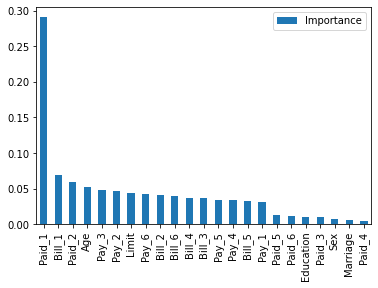

In [0]:
dimportance_df.plot(kind='bar')
plt.show()

In [0]:
rforest = RandomForestClassifier(random_state=2)

rforest.fit(x_train, y_train)

rforest_predictions = rforest.predict(x_test)

In [0]:
rforest.score(x_test, y_test)

0.819

In [0]:
print(dtree.score(x_test, y_test))
print(rforest.score(x_test, y_test))

0.7676666666666667
0.819


In [0]:
pd.crosstab(y_test, dtree.predict(x_test), rownames=['Actual'], colnames = ['Predicted:'], margins=True)

Predicted:,0,1,All
Actual,,,
0,4067,598,4665
1,796,539,1335
All,4863,1137,6000


In [0]:
pd.crosstab(y_test, rforest_predictions, rownames=['Actual'], colnames = ['Predicted:'], margins = True)

Predicted:,0,1,All
Actual,,,
0,4398,267,4665
1,819,516,1335
All,5217,783,6000


In [0]:
a = pd.get_dummies(df1[['Limit','Education','Age', 'Paid_1', 'Paid_2', 'Paid_3', 'Paid_4', 'Paid_5', 'Paid_6', 'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']])
b = df1['Default']

In [0]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=2)

In [0]:
tree1 = DecisionTreeClassifier(random_state=2, min_samples_leaf=5, min_samples_split=20)

tree1.fit(a_train, b_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [0]:
print(tree1.score(a_train, b_train))
print(tree1.score(a_test, b_test))
print(accuracy_score(tree1.predict(a_test), b_test)) 

0.8770833333333333
0.7631666666666667
0.7631666666666667


In [0]:
forest1 = RandomForestClassifier(random_state=2)

forest1.fit(a_train, b_train)

forest1_predictions = forest1.predict(a_test)

In [0]:
forest1.score(a_test, b_test)

0.8168333333333333

In [0]:
print(tree1.score(a_test, b_test))
print(forest1.score(a_test, b_test))

0.7631666666666667
0.8168333333333333


In [0]:
s = pd.get_dummies(df1[['Limit', 'Sex', 'Education', 'Marriage', 'Age', 'Paid_1', 'Paid_2', 'Paid_3', 'Paid_4', 'Paid_5', 'Paid_6', 'Bill_1', 'Bill_2', 'Bill_3', 'Bill_4', 'Bill_5', 'Bill_6', 'Pay_1', 'Pay_2', 'Pay_3', 'Pay_4', 'Pay_5', 'Pay_6']])
t = df1['Default']

In [0]:
s_train, s_test, t_train, t_test = train_test_split(s, t, test_size=0.05, random_state=2)

In [0]:
tree2 = DecisionTreeClassifier(random_state=2, min_samples_leaf=4, min_samples_split=15)

tree2.fit(s_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [0]:
print(tree2.score(s_train, t_train))
print(tree2.score(s_test, t_test))
print(accuracy_score(tree2.predict(s_test), t_test)) 

0.8907017543859649
0.7766666666666666
0.7766666666666666


In [0]:
forest2 = RandomForestClassifier(random_state= 3, min_samples_leaf= 5, min_samples_split= 8)

forest2.fit(s_train, t_train)

forest2_predictions = forest2.predict(s_test)

In [0]:
forest2.score(s_test, t_test)

0.8126666666666666

In [0]:
print(tree2.score(s_test, t_test))
print(forest2.score(s_test, t_test))

0.7766666666666666
0.8126666666666666


In [0]:
from sklearn.model_selection import GridSearchCV 
import numpy as np

max_depth = list(np.arange(1,10))
max_depth.append(None)
param_grid = { 
    'max_depth': max_depth,
    'n_estimators': np.arange(100, 1100, 200), 
    'min_samples_split': [2,4,8,16],
    'min_samples_leaf': [1, 2, 4]
}


In [0]:
np.arange(100, 1000, 100)
rf = RandomForestClassifier()
grid = GridSearchCV(estimator = rf, param_grid=param_grid, 
                          cv = 3, verbose = 51, n_jobs=-1)

In [0]:
import time
from sklearn.model_selection import train_test_split


In [0]:
X, Z = df1.drop(columns=['Default']), df1.Default

In [0]:
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, random_state = 811, train_size=0.8)

t_start = time.time()
grid.fit(X_train, Z_train)
t_end = time.time()


Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
Memmapping (shape=(23, 24000), dtype=int64) to new file /dev/shm/joblib_memmapping_folder_124_1697855354/124-140536402926056-f09b96934a1f4ecf9d3e29f53361b551.pkl
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   20.0s
[Parallel(n_jobs

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[Parallel(n_jobs=-1)]: Done 1625 tasks      | elapsed: 160.0min
[Parallel(n_jobs=-1)]: Done 1626 tasks      | elapsed: 160.4min
[Parallel(n_jobs=-1)]: Done 1627 tasks      | elapsed: 160.6min
[Parallel(n_jobs=-1)]: Done 1628 tasks      | elapsed: 160.9min
[Parallel(n_jobs=-1)]: Done 1629 tasks      | elapsed: 161.2min
[Parallel(n_jobs=-1)]: Done 1630 tasks      | elapsed: 161.8min
[Parallel(n_jobs=-1)]: Done 1631 tasks      | elapsed: 162.0min
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed: 162.6min
[Parallel(n_jobs=-1)]: Done 1633 tasks      | elapsed: 163.1min
[Parallel(n_jobs=-1)]: Done 1634 tasks      | elapsed: 163.6min
[Parallel(n_jobs=-1)]: Done 1635 tasks      | elapsed: 163.8min
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed: 163.9min
[Parallel(n_jobs=-1)]: Done 1637 tasks      | elapsed: 164.0min
[Parallel(n_jobs=-1)]: Done 1638 tasks      | elapsed: 164.1min
[Parallel(n_jobs=-1)]: Done 1639 tasks      | elapsed: 164.3min
[Parallel(n_jobs=-1)]: Done 1640 tasks  

In [0]:
best = grid.best_estimator_
best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
best.fit(X_train, Z_train)
accuracy_score(Z_test, best.predict(X_test))

0.8218333333333333

In [0]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions = param_grid, 
                                   n_jobs = -1, verbose=50, n_iter=500, cv=3)

In [0]:
random_search.fit(X_train, Z_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  1.5min


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:  4.2min
[Paralle

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
best_random = random_search.best_estimator_ 
best_random

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
accuracy_score(Z_test, best_random.fit(X_train, Z_train).predict(X_test))

0.8213333333333334